# MNNIST with Softmax Regression by using torchvision library.
This code is all about MNIST using softmax regression model which can classify more than two kinds of groups.I focused on the structure of this code and try to memorize this sample code below. The general structure of code consist of 9 steps. The description fo these steps is introduced below.

__first__, declare the header.

__second__, select the device between 'cuda' or 'cpu'.

__third__, give random seed for all random values.

__fourth__, initialize the data.

__fifth__, select the model.

__sixth__, select the optimizer. for instance, Adam or SGD...

__seventh__, calculate the hypothesis(prediction).

__eighth__, calculate the cost between hypothesis and y_train(label).

__nineth__, implement gradient descent with partial differential.

###1. Header

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import random

###2. Select the device between 'CUDA' or 'CPU'

In [6]:
USE_CUDA = torch.cuda.is_available()

device = torch.device("cuda" if USE_CUDA else "cpu")
print("device: ", device)

다음 기기로 학습합니다:  cuda


###3. Give random seed for getting fixed value everytime.

In [7]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [8]:
training_epochs = 15
batch_size = 100

###4. Data

In [9]:
mnist_train = dsets.MNIST(root='MNIST_data/',train = True, transform = transforms.ToTensor(), download = True)
mnist_test  = dsets.MNIST(root='MNIST_data', train = False,transform = transforms.ToTensor(), download = True)


Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw




Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [10]:
dataloader = DataLoader(dataset = mnist_train, batch_size = batch_size, shuffle = True, drop_last=True)

###5. Model

In [50]:
class MultiClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(784, 10).to(device)

    def forward(self,x):
        return self.linear(x)

model = MultiClassifier()

###6. Optimizer

In [51]:
optimizer = torch.optim.SGD(model.parameters(),lr=1e-1)

###7. Cost

In [52]:
criterion = nn.CrossEntropyLoss().to(device)

###8., 9. Training

In [53]:
#print(len(mnist_train)) # 60000
#print(len(dataloader))      # 600
#print(batch_size)       # 100
    
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(dataloader)
    
    for idx,(X,Y) in enumerate(dataloader):
        X = X.view(-1,28*28).to(device)
        Y = Y.to(device)
        #print(X.shape) #[100, 784]
        #print(Y.shape) #[100,]

        hypothesis = model(X)
        cost = criterion(hypothesis, Y)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        #print('Cost: {}'.format(cost))
        avg_cost += cost / total_batch
        if idx % 300 == 0:
            print('Batch: {}/{}'.format(idx, len(dataloader)))
    print('Epoch: {:4d}/{} Cost:{:.6f}'.format(epoch+1,training_epochs, cost))

Batch: 0/600
Batch: 300/600
Epoch:    1/15 Cost:0.479262
Batch: 0/600
Batch: 300/600
Epoch:    2/15 Cost:0.399479
Batch: 0/600
Batch: 300/600
Epoch:    3/15 Cost:0.271671
Batch: 0/600
Batch: 300/600
Epoch:    4/15 Cost:0.317235
Batch: 0/600
Batch: 300/600
Epoch:    5/15 Cost:0.220806
Batch: 0/600
Batch: 300/600
Epoch:    6/15 Cost:0.272410
Batch: 0/600
Batch: 300/600
Epoch:    7/15 Cost:0.247328
Batch: 0/600
Batch: 300/600
Epoch:    8/15 Cost:0.333883
Batch: 0/600
Batch: 300/600
Epoch:    9/15 Cost:0.331542
Batch: 0/600
Batch: 300/600
Epoch:   10/15 Cost:0.090337
Batch: 0/600
Batch: 300/600
Epoch:   11/15 Cost:0.381127
Batch: 0/600
Batch: 300/600
Epoch:   12/15 Cost:0.282523
Batch: 0/600
Batch: 300/600
Epoch:   13/15 Cost:0.245104
Batch: 0/600
Batch: 300/600
Epoch:   14/15 Cost:0.261054
Batch: 0/600
Batch: 300/600
Epoch:   15/15 Cost:0.227718


torch.Size([10000, 784])
X_test:  tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
Y_test:  tensor([7, 2, 1,  ..., 4, 5, 6], device='cuda:0')
Accuracy: 0.8870999813079834
Label:  1
Prediction:  1


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


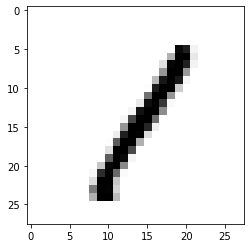

In [54]:
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    print(X_test.shape)
    print('X_test: ',X_test)
    print('Y_test: ',Y_test)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, dim=1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r].to(device)
    
    print('Label: ', Y_single_data.item())
    single_prediction = model(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()